In [1]:
Ok = """Topics Covered in this Chapter:-

    1)  Multiclcass Classification- iris, Visualizations, Model Training, Predictions
    2)  Regression--  Boston Housing Data
            A) Basic Descriptions
            B) Visualizations
            C) Evaluate different algoithms for regression
            D) Evaluate different algoithms for regression with standardization
            E) Tuning the Parameters of Best Algorithm using pipeline & GridSearch
            F) Ensemble Methods
                 Boosting Methods: AdaBoost (AB) and Gradient Boosting (GBM).
                 Bagging Methods: Random Forests (RF) and Extra Trees (ET).
            G) Tuning the parameters of Ensemble Models
            I) Finalize and retrain the model on whole dataset

    3) Binary Classification- Sonar vs Rocks Mine Dataset
            A) Description of Data
            B) Visualizations
            C) Model Evaluation Algorithm Comparison
            D) Model Evaluation on Stanadardized Data
            E) Parameter Tuning for the Best Model
            F) Ensemble Methods- Bagging and Boosting Techniques
            G) Finalize the Model

"""
print(Ok)

Topics Covered in this Chapter:-

    1)  Multiclcass Classification- iris, Visualizations, Model Training, Predictions
    2)  Regression--  Boston Housing Data
            A) Basic Descriptions
            B) Visualizations
            C) Evaluate different algoithms for regression
            D) Evaluate different algoithms for regression with standardization
            E) Tuning the Parameters of Best Algorithm using pipeline & GridSearch
            F) Ensemble Methods
                 Boosting Methods: AdaBoost (AB) and Gradient Boosting (GBM).
                 Bagging Methods: Random Forests (RF) and Extra Trees (ET).
            G) Tuning the parameters of Ensemble Models
            I) Finalize and retrain the model on whole dataset

    3) Binary Classification- Sonar vs Rocks Mine Dataset
            A) Description of Data
            B) Visualizations
            C) Model Evaluation Algorithm Comparison
            D) Model Evaluation on Stanadardized Data
            E)

In [2]:
# Ignore the warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt


from numpy import set_printoptions
set_printoptions(precision=3)

In [4]:
# Creating a function printmd so that we can create chapter for easy vizualizations
from IPython.display import Markdown, display
def printbold(string):
    display(Markdown(string))

printbold('***Classification Techniques !! ***')

***Classification Techniques !! ***

In [5]:
# Summarization of the data.

data = pd.read_csv('C:/Users/sohail.ahmad/ML Mastery Jason/iris.csv', encoding="utf-8")

print("Dimension of the data: {}".format(data.shape))
print("\n")
print("Names of the variables: {}".format(list(data.columns.values)))
print("\n")
print("Description of the variables: \n{}".format(display(data.describe().round(2))))
print("\n")
print("1st 20 rows of data: \n{}".format(display(data.head(20))))
print("\n")
print("Type of variables: \n{}".format(data.dtypes))
print("\n")
print("Label count of categorical valriable iris: {}".format(data.groupby('iris').size()))

Dimension of the data: (150, 5)


Names of the variables: ['sepal length', 'sepal width', 'petal length', 'petal width', 'iris']




,sepal length,sepal width,petal length,petal width
count,150.00,150.00,150.00,150.00
mean,5.84,3.05,3.76,1.20
std,0.83,0.43,1.76,0.76
min,4.30,2.00,1.00,0.10
25%,5.10,2.80,1.60,0.30
50%,5.80,3.00,4.35,1.30
75%,6.40,3.30,5.10,1.80
max,7.90,4.40,6.90,2.50


Description of the variables: 
None




,sepal length,sepal width,petal length,petal width,iris
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


1st 20 rows of data: 
None


Type of variables: 
sepal length    float64
sepal width     float64
petal length    float64
petal width     float64
iris             object
dtype: object


Label count of categorical valriable iris: iris
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


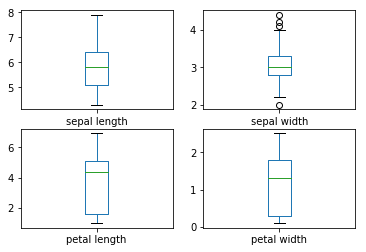

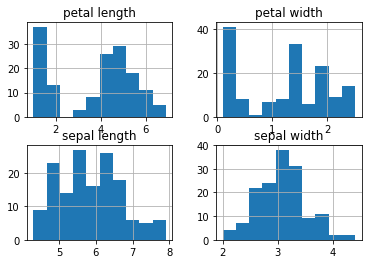

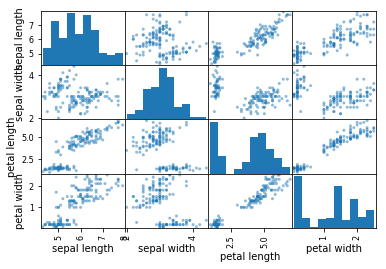

In [6]:
#Data Visualizations. Univariate Plots. 

#Box and whisker plot of numeric variables
data.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

# Histogram. Two of the plots seem to have gaussian distribution
data.hist()
plt.show()

# Scatter matrix
from pandas.tools.plotting import scatter_matrix
scatter_matrix(data)
plt.show()

In [7]:
from sklearn.model_selection import train_test_split
array = data.values
X = array[:,0:4]
y = array[:,4]
val_size = 0.2

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=val_size, random_state=7)




In [8]:
# Here we try different ML methods and choose the best one to predict on test set

from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC


models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('knn', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('nb', GaussianNB()))
models.append(('svm', SVC()))

results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10, random_state = 7)
    cv_results= cross_val_score(model, X_train, y_train, cv=kfold, scoring = 'accuracy')
    results.append(cv_results)
    names.append(name)
    msg = " %s: %f (%f) " % (name, cv_results.mean(), cv_results.std())
    print(msg)



 LR: 0.966667 (0.040825) 
 LDA: 0.975000 (0.038188) 
 knn: 0.983333 (0.033333) 
 CART: 0.966667 (0.040825) 
 nb: 0.975000 (0.053359) 
 svm: 0.991667 (0.025000) 


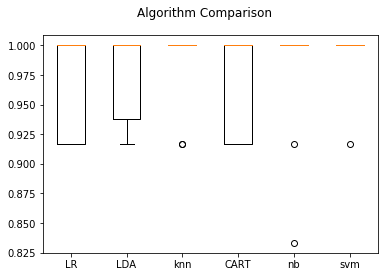

In [9]:
# Compare algorithm results
fig = plt.figure()
fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()


In [10]:
# Make Predictions using knn since it gives best comparative result

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
predictions = knn.predict(X_val)
print("Accuracy on test set: {}".format(accuracy_score(y_val, predictions)))
print("\n")
print("Confusion Matrix: {}".format(confusion_matrix(y_val, predictions)))
print("\n")
print("Classification Report: \n{}".format(classification_report(y_val, predictions)))

Accuracy on test set: 0.9


Confusion Matrix: [[ 7  0  0]
 [ 0 11  1]
 [ 0  2  9]]


Classification Report: 
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.85      0.92      0.88        12
 Iris-virginica       0.90      0.82      0.86        11

    avg / total       0.90      0.90      0.90        30



In [11]:
printbold("**Regression Techniques- Boston Housing Dataset !!**")

**Regression Techniques- Boston Housing Dataset !!**

In [12]:
import pandas as pd
boston = pd.read_csv('C:/Users/sohail.ahmad/ML Mastery Jason/boston_housing.csv', encoding='utf-8')
display(round(boston.head(10),2))

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PT,B,LSTAT,MV
0,0.01,18.0,2.31,0,0.54,6.57,65.2,4.09,1,296,15.3,396.90,4.98,24.0
1,0.03,0.0,7.07,0,0.47,6.42,78.9,4.97,2,242,17.8,396.90,9.14,21.6
2,0.03,0.0,7.07,0,0.47,7.18,61.1,4.97,2,242,17.8,392.83,4.03,34.7
3,0.03,0.0,2.18,0,0.46,7.00,45.8,6.06,3,222,18.7,394.63,2.94,33.4
4,0.07,0.0,2.18,0,0.46,7.15,54.2,6.06,3,222,18.7,396.90,5.33,36.2
5,0.03,0.0,2.18,0,0.46,6.43,58.7,6.06,3,222,18.7,394.12,5.21,28.7
6,0.09,12.5,7.87,0,0.52,6.01,66.6,5.56,5,311,15.2,395.60,12.43,22.9
7,0.14,12.5,7.87,0,0.52,6.17,96.1,5.95,5,311,15.2,396.90,19.15,27.1
8,0.21,12.5,7.87,0,0.52,5.63,100.0,6.08,5,311,15.2,386.63,29.93,16.5
9,0.17,12.5,7.87,0,0.52,6.00,85.9,6.59,5,311,15.2,386.71,17.10,18.9


In [13]:
ok = """ Data Description of the boston housing dataset:-
1. CRIM: per capita crime rate by town
2. ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
3. INDUS: proportion of non-retail business acres per town
4. CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
5. NOX: nitric oxides concentration (parts per 10 million)
6. RM: average number of rooms per dwelling
7. AGE: proportion of owner-occupied units built prior to 1940
8. DIS: weighted distances to five Boston employment centers
9. RAD: index of accessibility to radial highways
10. TAX: full-value property-tax rate per $10,000
11. PTRATIO: pupil-teacher ratio by town
12. B: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
13. LSTAT: % lower status of the population
14. MEDV: Median value of owner-occupied homes in $1000s"""
print(ok)

 Data Description of the boston housing dataset:-
1. CRIM: per capita crime rate by town
2. ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
3. INDUS: proportion of non-retail business acres per town
4. CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
5. NOX: nitric oxides concentration (parts per 10 million)
6. RM: average number of rooms per dwelling
7. AGE: proportion of owner-occupied units built prior to 1940
8. DIS: weighted distances to five Boston employment centers
9. RAD: index of accessibility to radial highways
10. TAX: full-value property-tax rate per $10,000
11. PTRATIO: pupil-teacher ratio by town
12. B: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
13. LSTAT: % lower status of the population
14. MEDV: Median value of owner-occupied homes in $1000s


In [14]:
# Summarization of the variables

print(f"Shape of the data: {boston.shape}")
print("\n")
print("Nature of variables: \n{}".format(boston.dtypes))
print("\n")
print("Summary of the variables: \n{}".format(round(boston.describe(),2)))
print("\n")
print("Correlation B/w Variables: \n{}".format(round(boston.corr(method='pearson'),2)))



Shape of the data: (506, 14)


Nature of variables: 
CRIM     float64
ZN       float64
INDUS    float64
CHAS       int64
NOX      float64
RM       float64
AGE      float64
DIS      float64
RAD        int64
TAX        int64
PT       float64
B        float64
LSTAT    float64
MV       float64
dtype: object


Summary of the variables: 
         CRIM      ZN   INDUS    CHAS     NOX      RM     AGE     DIS     RAD  \
count  506.00  506.00  506.00  506.00  506.00  506.00  506.00  506.00  506.00   
mean     3.61   11.36   11.14    0.07    0.55    6.28   68.57    3.80    9.55   
std      8.60   23.32    6.86    0.25    0.12    0.70   28.15    2.11    8.71   
min      0.01    0.00    0.46    0.00    0.38    3.56    2.90    1.13    1.00   
25%      0.08    0.00    5.19    0.00    0.45    5.89   45.02    2.10    4.00   
50%      0.26    0.00    9.69    0.00    0.54    6.21   77.50    3.21    5.00   
75%      3.68   12.50   18.10    0.00    0.62    6.62   94.07    5.19   24.00   
max     88.98  100

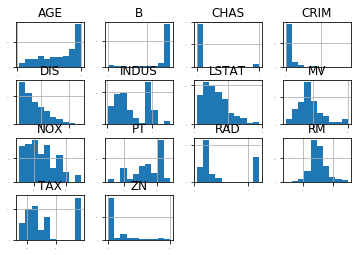

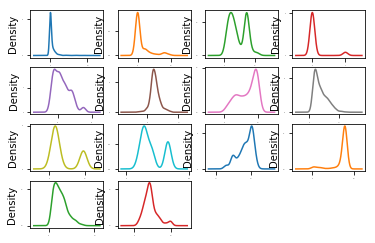

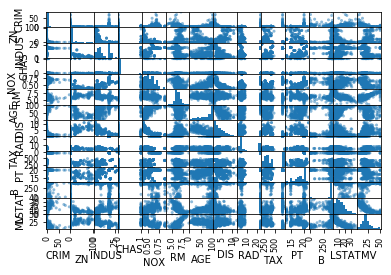

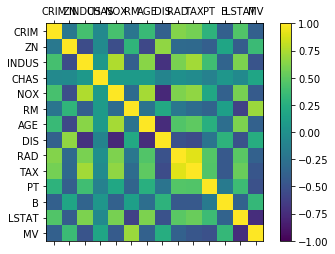

In [15]:
#Data Visualizations. Univariate Plots. 


# Histogram. 
boston.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1)
plt.show()

#Density plot of each variable
boston.plot(kind='density', subplots=True, layout=(4,4), sharex=False, legend=False, fontsize=1)
plt.show()

# Scatter matrix
from pandas.tools.plotting import scatter_matrix
scatter_matrix(boston)
plt.show()


# correlation matrix
import numpy
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(boston.corr(), vmin=-1, vmax=1, interpolation='none')
fig.colorbar(cax)
ticks = numpy.arange(0,14,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(boston.columns.values)
ax.set_yticklabels(boston.columns.values)
plt.show()

In [16]:
from sklearn.model_selection import train_test_split
array = boston.values
X = array[:, 0:13]
y = array[:, 13]
valid_size = 0.2
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=valid_size, random_state=7)

display(X_train[:2])

array([[1.066e-01, 8.000e+01, 1.910e+00, 0.000e+00, 4.130e-01, 5.936e+00,
        1.950e+01, 1.059e+01, 4.000e+00, 3.340e+02, 2.200e+01, 3.760e+02,
        5.570e+00],
       [4.812e+00, 0.000e+00, 1.810e+01, 0.000e+00, 7.130e-01, 6.701e+00,
        9.000e+01, 2.598e+00, 2.400e+01, 6.660e+02, 2.020e+01, 2.552e+02,
        1.642e+01]])

('LR', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))


LR -21.379856 (9.414263)
lasso -26.423562 (11.651110)
net -27.502260 (12.305022)
knn -41.896488 (13.901688)
CART -24.663217 (10.336416)
svm -85.518343 (31.994797)


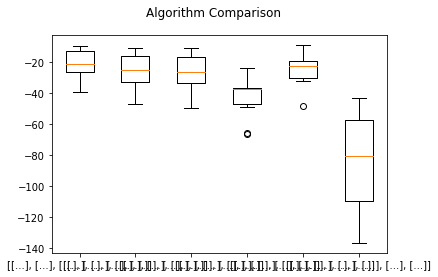

In [17]:
# Comparison of different models

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

models = []
models.append(('LR', LinearRegression()))
models.append(('lasso', Lasso()))
models.append(('net', ElasticNet()))
models.append(('knn', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('svm', SVR()))
print(models[0]) # Printing the shape of linear regression within the list
print("\n")

results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10, random_state=7)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring = 'neg_mean_squared_error')
    results.append(cv_results)
    names.append(names)
    msg = "%s %f (%F)" % (name, cv_results.mean(), cv_results.std())
    print(msg)


# Compare Algorithms. Due to difference of scale, some algorithms might not be showing true potential
# plot the distribution of scores across the cross validation folds.
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()


In [18]:
ok = """After standardizing the data, knn gives far more better results. We have used default k=7 in knn. We can improve knn even more with grid search. Lets do it in the next block"""

# Standardize the dataset
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

results1 = []
names1 = []
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR',LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()),('LASSO', Lasso())])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()),('EN', ElasticNet())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeRegressor())])))
pipelines.append(('ScaledSVR', Pipeline([('Scaler', StandardScaler()),('SVR', SVR())])))

for name, model in pipelines:
    kfold = KFold(n_splits=10, random_state=7)
    cv_results1 = cross_val_score(model, X_train, y_train, cv=kfold, scoring = 'neg_mean_squared_error')
    results1.append(cv_results1)
    names1.append(name)
    msg = "%s %f (%f)" % (name, cv_results1.mean(), cv_results1.std())
    print(msg)

print("\n")
print(ok)


ScaledLR -21.379856 (9.414263)
ScaledLASSO -26.607314 (8.978762)
ScaledEN -27.932373 (10.587491)
ScaledKNN -20.107621 (12.376949)
ScaledCART -26.747120 (10.658504)
ScaledSVR -29.633111 (17.009195)


After standardizing the data, knn gives far more better results. We have used default k=7 in knn. We can improve knn even more with grid search. Lets do it in the next block


In [19]:
# Using grid search to arrive at an optimal value of K

from sklearn.model_selection import GridSearchCV
scaler = StandardScaler().fit(X_train)
X_scaled = scaler.transform(X_train)
k_values = numpy.array([1,3,5,7,9,11,13,15,17,19,21])
param_grid = dict(n_neighbors=k_values)
model = KNeighborsRegressor()
kfold = KFold(n_splits=10, random_state=7)
grid = GridSearchCV(model, cv=kfold, param_grid = param_grid, scoring = 'neg_mean_squared_error')
grid_results = grid.fit(X_scaled, y_train)

print("Best Score is: %f using %s" % (grid_results.best_score_, grid_results.best_params_))
print("\n")
means = grid_results.cv_results_['mean_test_score']
stds = grid_results.cv_results_['std_test_score']
params = grid_results.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with %r" % (mean, stdev, param))


Best Score is: -18.172137 using {'n_neighbors': 3}


-20.208664 (15.029651) with {'n_neighbors': 1}
-18.172137 (12.950570) with {'n_neighbors': 3}
-20.131163 (12.203696) with {'n_neighbors': 5}
-20.575845 (12.345886) with {'n_neighbors': 7}
-20.368264 (11.621738) with {'n_neighbors': 9}
-21.009204 (11.610012) with {'n_neighbors': 11}
-21.151809 (11.943318) with {'n_neighbors': 13}
-21.557400 (11.536338) with {'n_neighbors': 15}
-22.789938 (11.566860) with {'n_neighbors': 17}
-23.871873 (11.340389) with {'n_neighbors': 19}
-24.361362 (11.914786) with {'n_neighbors': 21}


In [20]:
printbold("**Ensemble Methods**")

ok = """Another way that we can improve the performance of algorithms on this boston housing problem is by using ensemble methods. In this section we will evaluate four different ensemble machine learning algorithms, two boosting and two bagging methods:
         Boosting Methods: AdaBoost (AB) and Gradient Boosting (GBM).
         Bagging Methods: Random Forests (RF) and Extra Trees (ET)."""
print(ok)

**Ensemble Methods**

Another way that we can improve the performance of algorithms on this boston housing problem is by using ensemble methods. In this section we will evaluate four different ensemble machine learning algorithms, two boosting and two bagging methods:
         Boosting Methods: AdaBoost (AB) and Gradient Boosting (GBM).
         Bagging Methods: Random Forests (RF) and Extra Trees (ET).


('ScaledAB', Pipeline(memory=None,
     steps=[('Scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('AB', AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
         n_estimators=50, random_state=None))]))




C:\Users\sohail.ahmad\anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


ScaledAB: -15.409234 (6.543733)
ScaledGBM: -9.643903 (4.189459)
ScaledRF: -12.830618 (6.683707)
ScaledET: -11.117299 (6.901248)


It looks like Gradient Boosting has a better mean score, it also looks like Extra Trees has a similar distribution and perhaps a better median score. We have used default number of boosting stages (100) to perform (n estimators). We will use diff value of n_estimators in next block.


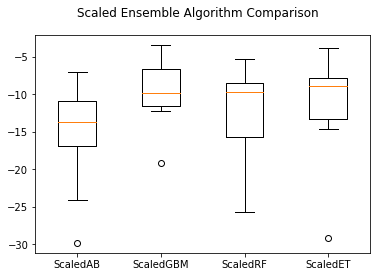

In [21]:
# ensembles

from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor

ensembles = []
ensembles.append(('ScaledAB', Pipeline([('Scaler', StandardScaler()),('AB', AdaBoostRegressor())])))
ensembles.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()),('GBM', GradientBoostingRegressor())])))
ensembles.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()),('RF', RandomForestRegressor())])))
ensembles.append(('ScaledET', Pipeline([('Scaler', StandardScaler()),('ET', ExtraTreesRegressor())])))
print(ensembles[0])
print("\n")

results = []
names = []
for name, model in ensembles:
    kfold = KFold(n_splits=10, random_state=7)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
print("\n")
    
ok = """It looks like Gradient Boosting has a better mean score, it also looks like Extra Trees has a similar distribution and perhaps a better median score. We have used default number of boosting stages (100) to perform (n estimators). We will use diff value of n_estimators in next block."""
print(ok)
# Compare Algorithms. plot the distribution of scores across the cross validation folds.
fig = plt.figure()
fig.suptitle('Scaled Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()


In [22]:
# Tune scaled GBM. Lets use diferent values for n_estimators
# Tune scaled GBM
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_grid = dict(n_estimators=numpy.array([50,100,150,200,250,300,350,400]))
model = GradientBoostingRegressor(random_state=7)
kfold = KFold(n_splits=10, random_state=7)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=kfold)
grid_result = grid.fit(rescaledX, y_train)


print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))




Best: -9.090877 using {'n_estimators': 400}
-10.519849 (4.569459) with: {'n_estimators': 50}
-9.758073 (4.322019) with: {'n_estimators': 100}
-9.415956 (4.198639) with: {'n_estimators': 150}
-9.258934 (4.234366) with: {'n_estimators': 200}
-9.180855 (4.232721) with: {'n_estimators': 250}
-9.164348 (4.238892) with: {'n_estimators': 300}
-9.103866 (4.218258) with: {'n_estimators': 350}
-9.090877 (4.235108) with: {'n_estimators': 400}


In [23]:
# Finalize the model. prepare the model
from sklearn.metrics import mean_squared_error
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = GradientBoostingRegressor(random_state=7, n_estimators=400)
model.fit(rescaledX, y_train)

# transform the validation dataset
rescaledValX = scaler.transform(X_val)
predictions = model.predict(rescaledValX)
print(mean_squared_error(y_val, predictions))



11.613797318486105


In [24]:
printbold("**Binary Classification-- Sonar Mines vs Rocks !!**")

**Binary Classification-- Sonar Mines vs Rocks !!**

In [25]:
sonar = pd.read_csv('C:/Users/sohail.ahmad/ML Mastery Jason/sonar.csv', encoding="utf-8")

print("Dimensions of the data: {}".format(sonar.shape))
print("\n")
print(sonar.head(10))
print("\n")
print("Type of variables: {}".format(sonar.dtypes))

from pandas import set_option
set_option('precision', 3)
print("Summary of the data: \n{}".format(sonar.describe()))

# class distribution of response variable class
print("\n")
print(sonar.groupby('Class').size())

Dimensions of the data: (208, 61)


       V1      V2      V3      V4      V5      V6      V7      V8      V9  \
0  0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109   
1  0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
2  0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
3  0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
4  0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   
5  0.0286  0.0453  0.0277  0.0174  0.0384  0.0990  0.1201  0.1833  0.2105   
6  0.0317  0.0956  0.1321  0.1408  0.1674  0.1710  0.0731  0.1401  0.2083   
7  0.0519  0.0548  0.0842  0.0319  0.1158  0.0922  0.1027  0.0613  0.1465   
8  0.0223  0.0375  0.0484  0.0475  0.0647  0.0591  0.0753  0.0098  0.0684   
9  0.0164  0.0173  0.0347  0.0070  0.0187  0.0671  0.1056  0.0697  0.0962   

      V10  ...       V52     V53     V54     V55     V56     V57     V58  \
0  0.2111  ...    0.0027  0.0065  0.0159

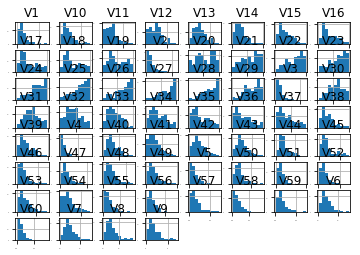

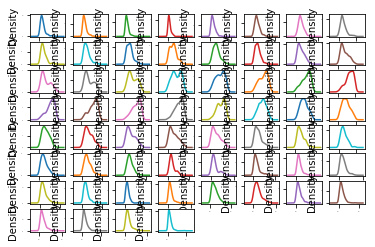

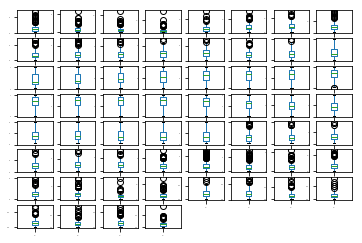

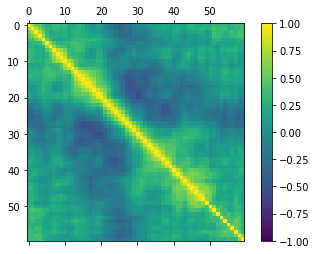

In [26]:
# Visualizations
# histograms
sonar.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1)
plt.show()

# density
sonar.plot(kind='density', subplots=True, layout=(8,8), sharex=False, legend=False, fontsize=1)
plt.show()

# box and whisker plots
sonar.plot(kind='box', subplots=True, layout=(8,8), sharex=False, sharey=False, fontsize=1)
plt.show()


# correlation matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(sonar.corr(), vmin=-1, vmax=1, interpolation='none')
fig.colorbar(cax)
plt.show()


In [27]:
# Validation Dataset
# Split-out validation dataset
from sklearn.model_selection import train_test_split
array = sonar.values
X = array[:,0:60].astype(float)
y = array[:,60]
validation_size = 0.20
seed = 7
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=validation_size, random_state=seed)


LR: 0.782721 (0.093796)
LDA: 0.746324 (0.117854)
KNN: 0.808088 (0.067507)
CART: 0.728676 (0.114831)
NB: 0.648897 (0.141868)
SVM: 0.608824 (0.118656)


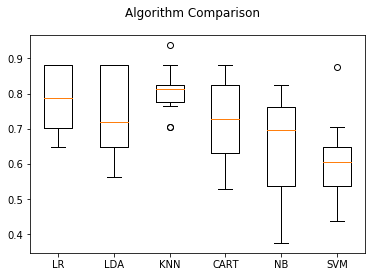

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Test options and evaluation metric
num_folds = 10
seed = 7
scoring = 'accuracy'


# Spot-Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()


ScaledLR: 0.734191 (0.095885)
ScaledLDA: 0.746324 (0.117854)
ScaledKNN: 0.825735 (0.054511)
ScaledCART: 0.711029 (0.097661)
ScaledNB: 0.648897 (0.141868)
ScaledSVM: 0.836397 (0.088697)


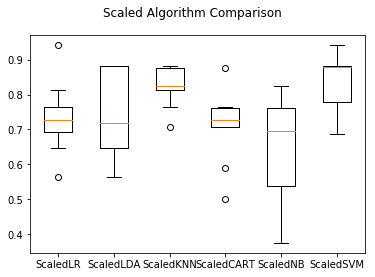

In [29]:
# Evaluate Algorithms: Standardize Data
# Standardize the dataset

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR', LogisticRegression())])))
pipelines.append(('ScaledLDA', Pipeline([('Scaler', StandardScaler()),('LDA', LinearDiscriminantAnalysis())])))

pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB', GaussianNB())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC())])))

results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Compare Algorithms
fig = plt.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()


In [30]:
# Algorithm Tuning. KNN Tuning. Tune scaled KNN
from sklearn.model_selection import GridSearchCV

scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
neighbors = [1,3,5,7,9,11,13,15,17,19,21]
param_grid = dict(n_neighbors=neighbors)
model = KNeighborsClassifier()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.849398 using {'n_neighbors': 1}
0.849398 (0.059881) with: {'n_neighbors': 1}
0.837349 (0.066303) with: {'n_neighbors': 3}
0.837349 (0.037500) with: {'n_neighbors': 5}
0.765060 (0.089510) with: {'n_neighbors': 7}
0.753012 (0.086979) with: {'n_neighbors': 9}
0.734940 (0.104890) with: {'n_neighbors': 11}
0.734940 (0.105836) with: {'n_neighbors': 13}
0.728916 (0.075873) with: {'n_neighbors': 15}
0.710843 (0.078716) with: {'n_neighbors': 17}
0.722892 (0.084555) with: {'n_neighbors': 19}
0.710843 (0.108829) with: {'n_neighbors': 21}


In [31]:
# Tuning SVM

# Tune scaled SVM
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']
param_grid = dict(C=c_values, kernel=kernel_values)
model = SVC()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
 print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.867470 using {'C': 1.5, 'kernel': 'rbf'}
0.759036 (0.098863) with: {'C': 0.1, 'kernel': 'linear'}
0.530120 (0.118780) with: {'C': 0.1, 'kernel': 'poly'}
0.572289 (0.130339) with: {'C': 0.1, 'kernel': 'rbf'}
0.704819 (0.066360) with: {'C': 0.1, 'kernel': 'sigmoid'}
0.746988 (0.108913) with: {'C': 0.3, 'kernel': 'linear'}
0.644578 (0.132290) with: {'C': 0.3, 'kernel': 'poly'}
0.765060 (0.092312) with: {'C': 0.3, 'kernel': 'rbf'}
0.734940 (0.054631) with: {'C': 0.3, 'kernel': 'sigmoid'}
0.740964 (0.083035) with: {'C': 0.5, 'kernel': 'linear'}
0.680723 (0.098638) with: {'C': 0.5, 'kernel': 'poly'}
0.789157 (0.064316) with: {'C': 0.5, 'kernel': 'rbf'}
0.746988 (0.059265) with: {'C': 0.5, 'kernel': 'sigmoid'}
0.746988 (0.084525) with: {'C': 0.7, 'kernel': 'linear'}
0.740964 (0.127960) with: {'C': 0.7, 'kernel': 'poly'}
0.813253 (0.084886) with: {'C': 0.7, 'kernel': 'rbf'}
0.753012 (0.058513) with: {'C': 0.7, 'kernel': 'sigmoid'}
0.759036 (0.096940) with: {'C': 0.9, 'kernel': 'linear'

In [32]:
Ok = """Ensemble Methods

 Boosting Methods: AdaBoost (AB) and Gradient Boosting (GBM).
 Bagging Methods: Random Forests (RF) and Extra Trees (ET).
"""

print(Ok)

Ensemble Methods

 Boosting Methods: AdaBoost (AB) and Gradient Boosting (GBM).
 Bagging Methods: Random Forests (RF) and Extra Trees (ET).



AB: 0.819853 (0.058293)
GBM: 0.835662 (0.103688)
RF: 0.741544 (0.087898)
ET: 0.800368 (0.077084)


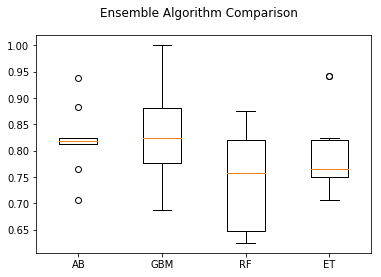

In [33]:
# ensembles
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

ensembles = []
ensembles.append(('AB', AdaBoostClassifier()))
ensembles.append(('GBM', GradientBoostingClassifier()))
ensembles.append(('RF', RandomForestClassifier()))
ensembles.append(('ET', ExtraTreesClassifier()))
results = []
names = []
for name, model in ensembles:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Compare Algorithms
fig = plt.figure()
fig.suptitle('Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [34]:
# Finalize Model. prepare the model
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = SVC(C=1.5)
model.fit(rescaledX, y_train)

# estimate accuracy on validation dataset
rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)
print(accuracy_score(y_validation, predictions))
print(confusion_matrix(y_validation, predictions))
print(classification_report(y_validation, predictions))

0.8571428571428571
[[23  4]
 [ 2 13]]
             precision    recall  f1-score   support

          M       0.92      0.85      0.88        27
          R       0.76      0.87      0.81        15

avg / total       0.86      0.86      0.86        42



In [35]:
printbold("**The end, Bruh  !!**")

**The end, Bruh  !!**